# Lab 03

This homework is a kaggle-competition.
Link to join the competition: https://www.kaggle.com/t/1aeb25700aa34f3cbd8aad23c43ea5c6
Please make sure to use your real name so that your participation could be evaluated.

How to submit your solutions: see code in the notebook.
- Before  the final deadline you have to send a notebook with your best solution to `cosmic.research.ml@yandex.ru`
- Name your file according to this convention: `2021_lab03_GroupNumber_Surname_Name.ipynb`
- Attach your .ipynb to an email with topic `2021_lab03_GroupNumber_Surname_Name.ipynb`
- Send it to `cosmic.research.ml@yandex.ru`
- Final Deadline is `2021-11-03 23:00:00 +03:00`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Data can be downloaded from here: https://disk.yandex.ru/d/7aiYfUHOzX3IYw

In [2]:
train_db = pd.read_csv("data/train_db.csv")
test_db = pd.read_csv("data/test_db.csv")

In [3]:
train_db.shape, test_db.shape

((327828, 103), (81958, 102))

In [4]:
train_db.head()

,match_id,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,r2_hero,...,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win
0,0.0,62.0,0.0,611.0,608.0,2.0,0.0,7.0,9.0,97.0,...,194.0,-82.0,254.0,4.0,3.0,1.0,1.0,41.0,2336.0,1
1,1.0,21.0,0.0,1911.0,1743.0,29.0,0.0,6.0,8.0,98.0,...,60.0,-86.0,NaN,1.0,4.0,2.0,0.0,-17.0,3207.0,0
2,2.0,11.0,0.0,886.0,1127.0,14.0,0.0,14.0,9.0,104.0,...,NaN,-86.0,277.0,6.0,2.0,2.0,0.0,23.0,3025.0,0
3,3.0,31.0,0.0,1539.0,669.0,4.0,0.0,10.0,7.0,14.0,...,76.0,-73.0,NaN,4.0,5.0,2.0,0.0,158.0,2192.0,1
4,4.0,47.0,2.0,1947.0,1378.0,19.0,0.0,5.0,6.0,112.0,...,-68.0,-73.0,NaN,4.0,1.0,0.0,0.0,NaN,2385.0,1


In [5]:
Y_train = train_db["radiant_win"]
X_train = train_db.drop(columns=["radiant_win"])
X_train = X_train.fillna(X_train.mean())
X_test = test_db.fillna(X_train.mean())

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

SEED = 42

# Public Baseline

In [7]:
clf = DecisionTreeClassifier()

print(np.mean(cross_val_score(clf, X_train, Y_train, cv=5, scoring='roc_auc', n_jobs=-1)))

0.7609171839938187


In [8]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

In [9]:
predictions = clf.predict_proba(X_test)[:, 1]

In [10]:
submit_data = test_db[["match_id"]].copy()
submit_data.loc[:, "radiant_win"] = predictions
submit_data.to_csv("public_baseline_submission.csv", index=None)

# Medium Baseline

In [11]:
clf1 = RandomForestClassifier(random_state=SEED)

print(np.mean(cross_val_score(clf1, X_train, Y_train, cv=2, scoring='roc_auc', n_jobs=-1)))

0.9482703642775347


In [12]:
clf1.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [13]:
pred = clf1.predict_proba(X_test)[:, 1]

In [14]:
submit_data = test_db[["match_id"]].copy()
submit_data.loc[:, "radiant_win"] = pred
submit_data.to_csv("medium_baseline_submission.csv", index=None)

# Improvements

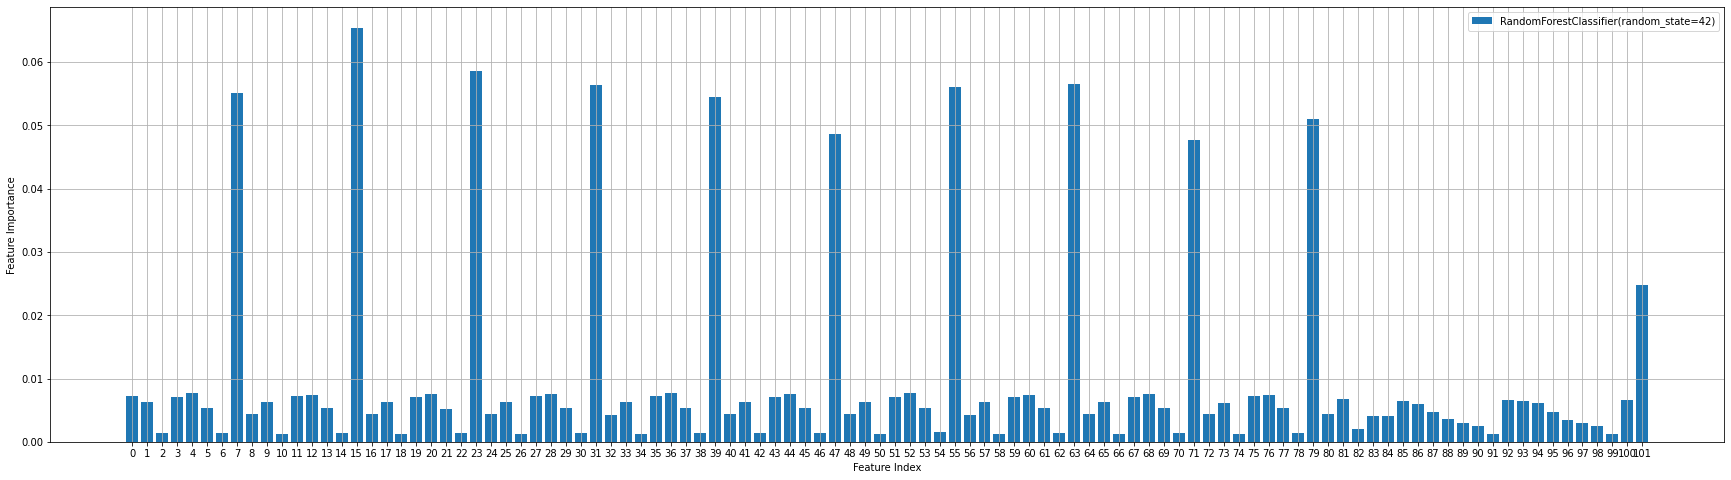

In [15]:
feature_importances = clf1.feature_importances_

ncoef = feature_importances.shape[0]
default_x = np.arange(ncoef)

plt.figure(figsize=(30,8))
plt.bar(default_x, feature_importances, label=clf1)
plt.xticks(default_x)
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [16]:
important_features_idx = (-feature_importances).argsort()[:11].tolist()
important_features_idx

[15, 23, 63, 31, 55, 7, 39, 79, 47, 71, 101]

In [17]:
X_train_smaller = X_train.iloc[:, important_features_idx]
X_test_smaller = X_test.iloc[:, important_features_idx]
X_train_smaller.head()

,r2_deaths,r3_deaths,d3_deaths,r4_deaths,d2_deaths,r1_deaths,r5_deaths,d5_deaths,d1_deaths,d4_deaths,duration
0,7.0,1.0,6.0,4.0,2.0,7.0,1.0,4.0,3.0,7.0,2336.0
1,5.0,5.0,9.0,6.0,7.0,6.0,8.0,2.0,8.0,2.0,3207.0
2,11.0,6.0,8.0,16.0,5.0,14.0,7.0,6.0,8.0,6.0,3025.0
3,2.0,0.0,12.0,0.0,4.0,10.0,0.0,6.0,9.0,6.0,2192.0
4,2.0,1.0,7.0,4.0,6.0,5.0,2.0,7.0,9.0,9.0,2385.0


In [18]:
clf2 = RandomForestClassifier(random_state=SEED, n_estimators=500, max_depth=100)

print(np.mean(cross_val_score(clf2, X_train, Y_train, cv=2, scoring='roc_auc', n_jobs=-1)))

0.9520484174408237


In [19]:
clf3 = RandomForestClassifier(random_state=SEED, n_estimators=500, max_depth=100)

print(np.mean(cross_val_score(clf3, X_train_smaller, Y_train, cv=3, scoring='roc_auc', n_jobs=-1)))

0.9512201406978549


In [20]:
clf4 = RandomForestClassifier(random_state=SEED, n_estimators=500, max_depth=100)

print(np.mean(cross_val_score(clf4, X_train, Y_train, cv=3, scoring='roc_auc', n_jobs=-1)))

0.9523850683722324


In [21]:
clf4.fit(X_train, Y_train)

RandomForestClassifier(max_depth=100, n_estimators=500, random_state=42)

In [22]:
pred = clf4.predict_proba(X_test)[:, 1]

In [23]:
submit_data = test_db[["match_id"]].copy()
submit_data.loc[:, "radiant_win"] = pred
submit_data.to_csv("improved_submission.csv", index=None)